# Linear Regression

* It is a Supervised Learning
* This method works on Regression Data and it is linear model ,i.e it works on the data related linearly like
  `y = Mx + c` that is data and labels must have simpler relation

  > Let's create an End-to-End work process with an example dataset from kaggle : https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

## Get the Data

In [1]:
# importing all necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Student_Performance.csv") # reading csv file
data.head() # viewing top 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# view the data type and information about columns

data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
# viewing parameters and deviations of numerical data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# Viewing the column names
for i in data.columns:
    print(i, f" --> datatype is {data[i].dtype}")

Hours Studied  --> datatype is int64
Previous Scores  --> datatype is int64
Extracurricular Activities  --> datatype is object
Sleep Hours  --> datatype is int64
Sample Question Papers Practiced  --> datatype is int64
Performance Index  --> datatype is float64


In [6]:
# We have Extracurricular Activities column as an object datatype

# let's check the data
data["Extracurricular Activities"]

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 10000, dtype: object

## Let's Visulaize the data and come back for data checking

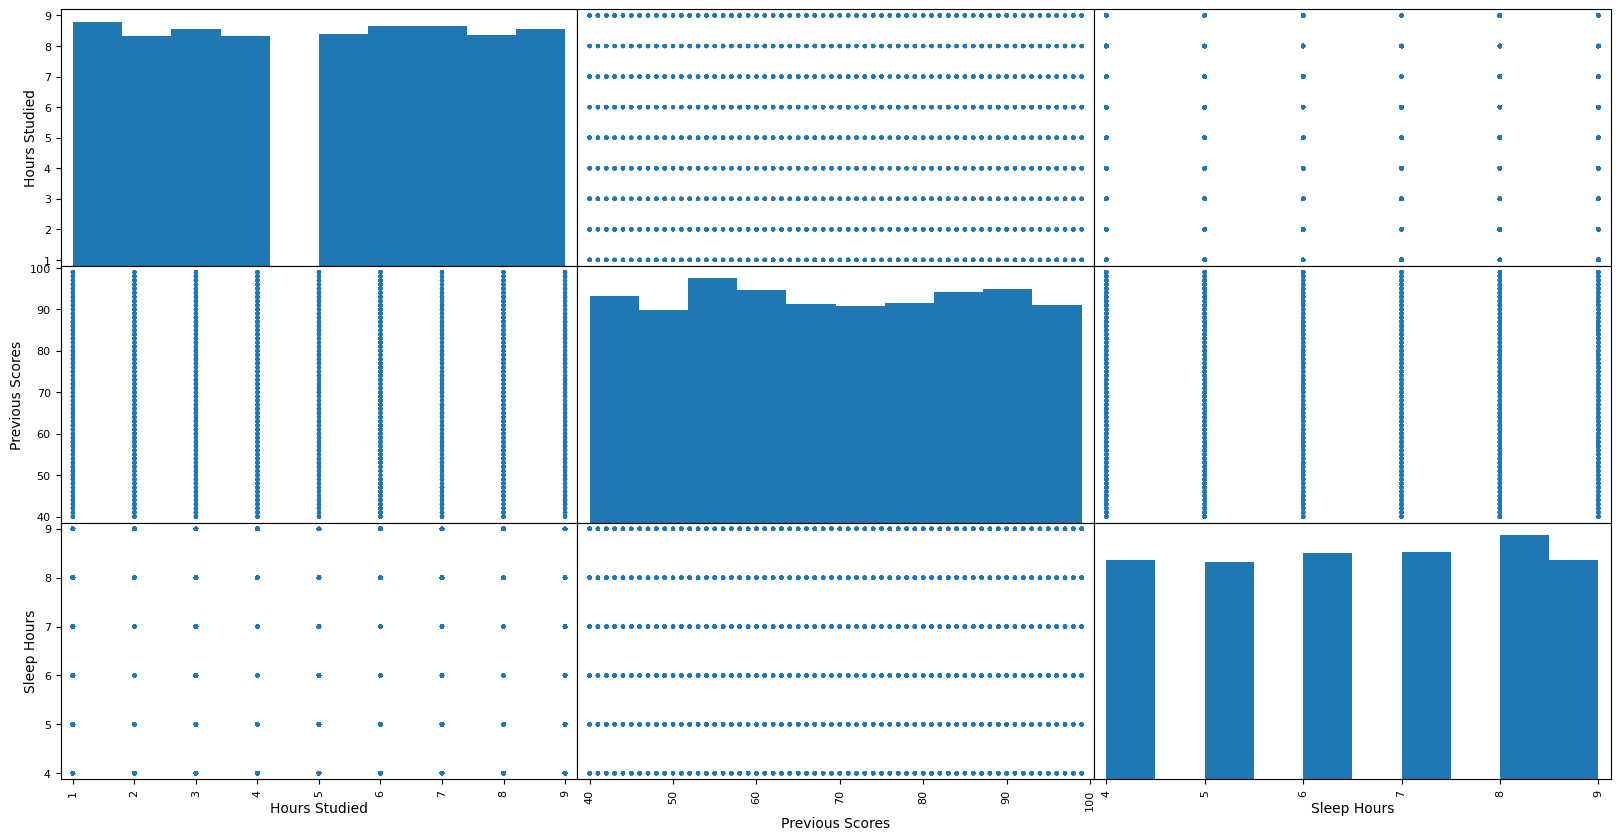

In [7]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attributes = data.columns[:4]
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

In [8]:
data.columns[:3]

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities'], dtype='object')

In [9]:
attributes = data.columns

**We can see that data is highly linear with respect to each column**

In [10]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [11]:
# we know already from info there are no null features but let's check pandas na function

null = data.isna().sum()
null # hence there are no null data in the dataset ,we don't need to fill any data

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
data.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## This is data is made accurately and i think it's not real data 

* It requires no imputation but we need to transform object column into numerical type

## Data Preprocessing

* In this we will first transform the object data type into numerical type
* Then we normalize the data using `StandardScaler()` or `MinMaxScaler()` called *Feature Scaling*

  *StandardScaler()* it substracts mean from each feature and divides by mean
  *MinMaxScaler()* it substracts min value from each featurea and divides by Max value

* Here we use both Scales and normal data to see the predictions and for testing

In [13]:
from sklearn.preprocessing import  StandardScaler ,MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline

In [14]:
X = data.drop("Performance Index" ,axis =1)
y = data["Performance Index"]
X_train , X_test , y_train,y_test = train_test_split(X,y , random_state = 42,
                                                    test_size = 0.2 ) # splitting the data into testing and training set

In [15]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((8000, 5), (8000,), (2000, 5), (2000,))

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

In [17]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("one_hot",one_hot,["Extracurricular Activities"]),
                       ("scale",StandardScaler(),['Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced'])],remainder = "passthrough")
train_data = ct.fit_transform(X_train)
test_data = ct.fit_transform(X_test)

In [18]:
train_data

array([[ 1.        ,  0.        ,  0.00645547, -1.18384439,  0.26988848,
         0.13404112],
       [ 0.        ,  1.        , -1.14974745, -1.24150571,  0.26988848,
         0.48356164],
       [ 1.        ,  0.        , -1.14974745,  0.66131759,  0.26988848,
        -0.91452044],
       ...,
       [ 1.        ,  0.        ,  1.54805935, -1.24150571,  0.26988848,
         0.48356164],
       [ 1.        ,  0.        , -1.53514842, -1.29916702,  1.4474766 ,
        -1.61356148],
       [ 1.        ,  0.        , -1.14974745, -1.35682833, -0.31890558,
         0.48356164]])

In [39]:
pd.DataFrame(train_data) # after columntransformation the order of columns will change wrt to the previous so it is best impute followed by one_hot encoding 

,0,1,2,3,4,5
0,1.0,0.0,0.500,0.152542,0.6,0.555556
1,0.0,1.0,0.125,0.135593,0.6,0.666667
2,1.0,0.0,0.125,0.694915,0.6,0.222222
3,1.0,0.0,0.125,0.101695,0.4,0.111111
4,1.0,0.0,0.875,0.118644,1.0,0.000000
...,...,...,...,...,...,...
7995,0.0,1.0,0.875,0.169492,0.4,0.666667
7996,1.0,0.0,0.375,0.474576,1.0,0.333333
7997,1.0,0.0,1.000,0.135593,0.6,0.666667
7998,1.0,0.0,0.000,0.118644,1.0,0.000000


In [19]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,No,7,5
1561,2,48,Yes,7,6
1670,2,81,No,7,2
6087,2,46,No,6,1
6669,8,47,No,9,0
...,...,...,...,...,...
5734,8,50,Yes,6,6
5191,4,68,No,9,3
5390,9,48,No,7,6
860,1,47,No,9,0


In [20]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,No,8,2
4684,2,46,Yes,4,8
1731,7,56,Yes,7,5
4742,6,42,Yes,8,5
4521,7,53,No,4,6
...,...,...,...,...,...
6412,2,70,No,7,3
8285,4,79,No,9,3
7853,2,40,Yes,7,2
1095,3,83,No,7,5


## Training the model

In [21]:
lnr_reg = LinearRegression()
lnr_reg.fit(train_data,y_train)

LinearRegression()

In [22]:
lnr_reg.score(train_data,y_train)

0.988689097520958

In [23]:
y_preds = lnr_reg.predict(test_data)

In [24]:
lnr_reg.score(test_data,y_test)

0.9884821561026672

In [25]:
y_preds.shape

(2000,)

In [26]:
y_test.shape

(2000,)

In [27]:
root_mean_squared_error(y_preds,y_test)

2.065996494857378

In [28]:
lnr_reg.intercept_


1284361519026.318

In [29]:
lnr_reg.coef_ # here the no of coefficients equala to no of features

array([-1.28436152e+12, -1.28436152e+12,  7.40134144e+00,  1.76374950e+01,
        8.10005188e-01,  5.48814297e-01])

''

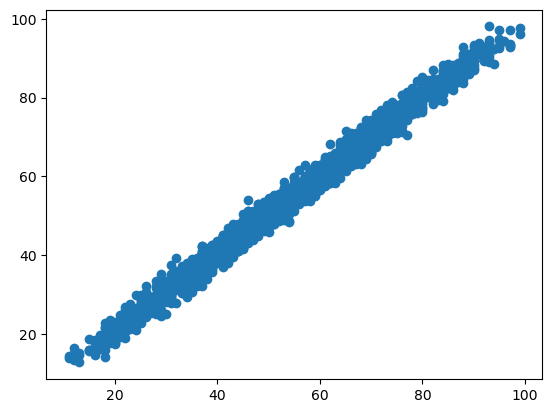

In [30]:
plt.scatter(y_test,y_preds)
# plt.xlim(0,200)
# plt.ylim(0,200)
;

In [31]:
np.linspace(0,100,2000)

array([0.00000000e+00, 5.00250125e-02, 1.00050025e-01, ...,
       9.98999500e+01, 9.99499750e+01, 1.00000000e+02])

In [32]:
## MinMaxScaler

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("one_hot",one_hot,["Extracurricular Activities"]),
                       ("scale",MinMaxScaler(),['Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced'])],remainder = "passthrough")
train_data = ct.fit_transform(X_train)
test_data = ct.fit_transform(X_test)

In [33]:
lnr_reg = LinearRegression()
lnr_reg.fit(train_data,y_train)

LinearRegression()

In [34]:
lnr_reg.score(train_data,y_train)*100

98.86891111522156

In [35]:
y_predict = lnr_reg.predict(test_data)

In [36]:
lnr_reg.score(test_data,y_test)

0.9889835052178767

In [37]:
root_mean_squared_error(y_test,y_preds)

2.065996494857378

In [38]:
train_data

array([[1.        , 0.        , 0.5       , 0.15254237, 0.6       ,
        0.55555556],
       [0.        , 1.        , 0.125     , 0.13559322, 0.6       ,
        0.66666667],
       [1.        , 0.        , 0.125     , 0.69491525, 0.6       ,
        0.22222222],
       ...,
       [1.        , 0.        , 1.        , 0.13559322, 0.6       ,
        0.66666667],
       [1.        , 0.        , 0.        , 0.11864407, 1.        ,
        0.        ],
       [1.        , 0.        , 0.125     , 0.10169492, 0.4       ,
        0.66666667]])